# Abgabe Module Library Carpentry MALIS 22.1 

- Vorname und Name: Inji Kim
- Matrikelnummer: 11157469
- Gruppe 'G' Mitglieder: Deborah Tabea Classen, Alena Hadanovic, Kerstin Kaiser, Inji Kim

## Beschreibung des Datensatzes

Folgendes jupyter-Notebook zeigt drei Fragestellungen und Lösungsansätze zur Implementation von Datenanalyse und Visualisierung mittels Python und der Library ‚pandas‘. 
Die Fragestellungen beziehen sich auf zwei Bezugsquellen und drei verschiedene Datensets im CSV-Format und werden im Folgenden jeweils dem kommentierten Codebeispiel vorangestellt. Die Datensets und deren Ausgabe als Visualisierung sind:

1. Seattle Public Library, Checkouts, 2018. -> Gegenüberstellung Häufigkeit Ausleihe 'E-Book vs. Book' als Pie-Chart
2. Seattle Public Library, Checkouts, 2021. -> Bildung eines Ranking mit Buchcover-Abbildung
3. British Library, Subset ‚Black History Month’. -> Verteilungshäufigkeit nicht-englischsprachigen Literatur als Pie-Chart


## Diskussion & Reflexion & Feedback

Wir sind mit unserer Ausarbeitung und dem sich daraus ergebenden Lerneffekt zufrieden. Änderungsbedarf im Code sehen wir im Bezug auf Automatisierung von Verarbeitungsschritten, welche wir an dieser Stelle manuell ausgeführt haben. Wie in  
*Datenset 2 Schritt 9.1* das Einpflegen von Image-Daten, welches im Arbeitsalltag sicher auch über Metadatenanbieter zu beziehen wären. Sowie in *Datenset 3 Schritt 3* das manuelle Verzeichnen der Sprachen, welches sicherlich auch automatisch aus dem DataFrame gezogen hätte werden können. 

Für uns erwies es sich anfänglich als schwierig, dass es regelmäßig zu Fehlermeldungen in Codezeilen kam, die kurz zuvor noch problemlos ausgeführt werden konnten, ohne dass für uns ein Auslöser erkannbar war. Wir mutmaßen jedoch, dass dies mit unserem nicht strikt durchgeführten linearen Laufen-lassen des Codes zusammenhängt bzw. wir ggf. durch die mehrfach Nutzung von Variablen-Bezeichnungen zur Ausgabe (auf die also im Hintergrund immer wieder zurückgegriffen wird) eine 'Knoten' verursachten. Lösen wäre ein solches Problem sicher durch die Setzung mehrerer Variablen-Bezeichnung entsprechen einem Arbeitsschritt?! Im Kontext der Problemlösung erwies sich die Arbeit in der Kleingruppe als besonders nützlich für gemeinsame Korrekturen und gegenseitiges Feedback.

Auch die Möglichkeit die konkreten Fragestellungen selbst zu wählen, war uns hilfreich, da diese so an die eingenen Fähigkeiten angepasst werden konnten und gleichzeitig zum Ausprobieren neuer Funktionen und der autodidaktischen Vertiefung des eigenen Wissens einluden.Ebenfalls als sehr positiv bewertete die Gruppe die Verwendung von Anaconda und Jupyter Notebook sowie das vorgegebene Template und die vorgeschlagenenen Datensätze als userfreundliche Arbeitstools.
 
Weiterführend wurde in der Gruppe die Idee eingebracht, die in der Ausarbeitung erstellten Visualisierungen zu exportieren und sich in diesem Rahmen auch in HTML, CSS und Webdesign einzuarbeiten.Außerdem wäre eine Vertiefung und konkrete Anwendungsbeispiel zu for-Loops sowie dem Erstellen und Reshaping von DataFrames nützlich, da sich hier ein großer Nutzen bei der Datenanalyse für den bibliothekarischen Arbeitsalltag erkennen lässt.


# Implementation der Library und Module zur Analyse und dem Öffnen der Files (global für dieses Notebook) 

In [1]:
# Dies importiert die library 'pandas'. 
# Mithilfe von 'pandas' kann man DataFrames (wie z. B. csv-Dateien) lesen, bearbeiten und analysieren. 
# 'pd' ist der gebräuchliche Nickname für 'pandas'
# Siehe hierzu auch: htps://pandas.pydata.org/pandas-docs/stable/index.html
import pandas as pd

# Import Python-Modul 'urllib.request'.
# Es dient dem öffnene von URLs
# Siehe hierzu auch: https://docs.python.org/3/library/urllib.request.html
import urllib.request

# Library zum Plotting der Daten
import matplotlib.pyplot as plt

# Import Phyton-Modul 'zipfile'.
# Es dient dem archivieren und öffnen von komprimierten Zip-Dateien
# Wird hier für die Datensets der British Library benötigt
# Siehe hierzu auch: https://docs.python.org/3/library/zipfile.html
from zipfile import ZipFile

# ----------------------------------------------------------------------------------------------------------

# Frage- und Zielstellung Datenset 1 'Seattle Public Library, Checkouts, 2018'

**Vorgehnsweise**: explorativ/~~systematisch~~  
**Fragestellung**: "Welcher Material-Typ ist in der Ausleihe am häufigsten?"  
**Ziel**: Gegenüberstellung Häufigkeit 'E-Book vs. Book'  
**Ausgabe Darstellungstyp**: Pie-Chart

**Beschreibung Datenset**:  

**What is the dataset, Checkouts by Title?**  
This dataset consists of monthly counts by title of checkout for all physical and digital items from 2005 to present. It’s of course a hefty dataset with more than 25 million.  
**When is the data updated?**
Data is updated monthly, on or about the 6th day of the month with the previous month’s data (e.g. checkouts in July should appear around August 6th).

**Where does the Checkouts by Title data come from?**
Checkout data comes from multiple current and historical sources. For digital items, the media vendors : Overdrive, hoopla, Freegal, and RBDigital provide usage data. For historical physical item checkouts from April 2005 to September 30, 2016, the source of this data is the Legrady artwork data archives. For October 1 2016 to present, the source is the Horizon ILS. 

Quelle: Seattle Public Library: "Checkouts by Title". URL:https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6 (26.08.2022)
 


## Download and Store Datenset 1

In [2]:
# Der Checkouts-Datensatz der Seattle Library
# https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6
year = 2018

# hier die maximale Anzahl an Einträgen setzen
limit = 10000

# Hier werden sogenannte f-strings genutzt um die Variablen in den URL-String zu setzen.
# Mehr Information: https://realpython.com/python-f-strings/
ausleihen_url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&$limit={limit}"
ausleihen_file_name = "Ausleihen.csv"

# Lädt die Daten herunter und speicher sie lokal - da muss man nicht jedes mal neu ausführen
urllib.request.urlretrieve(ausleihen_url, ausleihen_file_name)

('Ausleihen.csv', <http.client.HTTPMessage at 0x15e40068d30>)

## Zuweisung einer Variablen und Ausgabe Datenset 1 als DataFrame

In [3]:
# Zuweisung der Variablen
ausleihen = pd.read_csv(ausleihen_file_name)

In [4]:
# Ausgabebefehl Variable
ausleihen

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,AUDIOBOOK,2018,1,1,Cooking for Picasso: A Novel (unabridged) (Una...,NaN,Camille Aubray,"Fiction, Historical Fiction, Literature",Books on Tape,2016
9996,Digital,OverDrive,EBOOK,2018,1,1,The Book of Summer: A Novel,NaN,Michelle Gable,"Fiction, Historical Fiction, Literature",Macmillan Publishers,2017
9997,Physical,Horizon,BOOK,2018,1,1,Revival / Stephen King.,NaN,"King, Stephen, 1947-","Drug addicts Fiction, Clergy Fiction, Rock mus...","Thorndike Press,",2014.
9998,Physical,Horizon,BOOK,2018,1,4,Loula is leaving for Africa / written and illu...,NaN,"Villeneuve, Anne, 1966-","Imagination Juvenile fiction, Chauffeurs Juven...","Kids Can Press,",[2013]


## Abfragen zur Orientierung im Datenset 1


In [5]:
# Abfrage spezifische Spalten DataFrame sortiert nach Column 'checkouts'
ausleihen [["materialtype", "checkouts"]].sort_values("checkouts")

,materialtype,checkouts
4999,BOOK,1
5524,EBOOK,1
5523,BOOK,1
5522,BOOK,1
5521,EBOOK,1
...,...,...
6021,BOOK,114
7732,VIDEODISC,176
9207,MAGAZINE,354
9651,BOOK,495


In [6]:
# Abfrage der Summe aller Ausleihen('checkouts')
ausleihen['checkouts'].sum()

33390

## Lösung der Fragestellung

In [7]:
# Schritt 1: 
# Erstellen einer Variablen zur Summierung der 'checkouts' nach Materialtyp zum Verschaffen einer Übersicht
groupby_sum1 = ausleihen [["materialtype", "checkouts"]].sort_values("checkouts").groupby(['materialtype']).sum()
groupby_sum1

,checkouts
materialtype,
ATLAS,2
AUDIOBOOK,3115
BOOK,14180
COMIC,181
CR,10
EBOOK,5783
ER,4
"ER, SOUNDDISC",4
"ER, VIDEODISC",4


In [8]:
# Schritt 2: 
# Abfrage des Zuschnitts des DataFrames 'groupby_sum1' zur Anzeige der Menge der verschiedenen Materialatypen
groupby_sum1.shape

(24, 1)

###### Schritt 3: Entscheidung, dass nur die Ausleihen von eBooks und Büchern  verglichen werden sollen

In [9]:
# Schritt 4:
# Erzeugung einer Variablen zur summierten Darstellung der Matierialtypen 'EBOOK' und 'Book'
ausleihen_ebook_vs_printbook = groupby_sum1.sort_values("checkouts").loc[["EBOOK", "BOOK"]]
ausleihen_ebook_vs_printbook

,checkouts
materialtype,
EBOOK,5783
BOOK,14180


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E40423A30>],
      dtype=object)

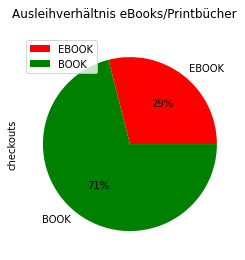

In [10]:
# Schritt 5: 
# Anweisung zur Ausgabe als Pie-Chart mit Titel
ausleihen_ebook_vs_printbook.plot(kind="pie", subplots="FALSE", colors = ["red", "green"], title ="Ausleihverhältnis eBooks/Printbücher", autopct='%1.0f%%')

# ----------------------------------------------------------------------------------------------------------

#  Frage- und Zielstellung Datenset 2 'Seattle Public Library, Checkouts, 2021'  


.**Vorgehnsweise**: ~~explorativ~~/systematisch  
**Fragestellung**: "Welche 10 physischen Bücher sind 2021 am häufigsten ausgeliehen worden?"  
**Ziel**: Ranking mit Buchcover-Abbildung  
**Ausgabe Darstellungstyp**: Illustration

**Beschreibung Datenset**:

**What is the dataset, Checkouts by Title?**  
This dataset consists of monthly counts by title of checkout for all physical and digital items from 2005 to present. It’s of course a hefty dataset with more than 25 million.  
**When is the data updated?**
Data is updated monthly, on or about the 6th day of the month with the previous month’s data (e.g. checkouts in July should appear around August 6th).

**Where does the Checkouts by Title data come from?**
Checkout data comes from multiple current and historical sources. For digital items, the media vendors : Overdrive, hoopla, Freegal, and RBDigital provide usage data. For historical physical item checkouts from April 2005 to September 30, 2016, the source of this data is the Legrady artwork data archives. For October 1 2016 to present, the source is the Horizon ILS. 

Quelle: Seattle Public Library: "Checkouts by Title". URL:https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6 (26.08.2022)
  



##  Download and Store Datenset  2

In [11]:
# Datenset importieren

# Der Checkouts-Datensatz der Seattle Library
# https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

year = 2021

# hier die maximale Anzahl an Einträgen setzen
limit = 2000000

# Hier werden sogenannte f-strings genutzt um die Variablen in den URL-String zu setzen.
# Mehr Information: https://realpython.com/python-f-strings/
checkouts_url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&$limit={limit}"
checkouts_file_name = "checkouts.csv"

# Lädt die Daten herunter und speicher sie lokal - da muss man nicht jedes mal neu ausführen
urllib.request.urlretrieve(checkouts_url, checkouts_file_name)

('checkouts.csv', <http.client.HTTPMessage at 0x15e40b7cfd0>)

In [12]:
# Zuweisung der Variablen 'checkouts'
# CSV-Daten in einen pandas-DataFrame laden
checkouts = pd.read_csv(checkouts_file_name)

In [13]:
# Abfrage der Variablen
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2021,3,5,Prep: A Novel (unabridged) (Unabridged),NaN,Curtis Sittenfeld,"Fiction, Literature",Books on Tape,2019
1,Digital,OverDrive,EBOOK,2021,3,4,"Toys Go Out: Toys Go Out Series, Book 1",NaN,Emily Jenkins,"Fantasy, Juvenile Fiction, Picture Book Fiction","Random House, Inc.",2011
2,Digital,OverDrive,EBOOK,2021,3,1,Here Comes Trouble,NaN,Donna Kauffman,"Fiction, Romance","Random House, Inc.",2010
3,Digital,OverDrive,AUDIOBOOK,2021,3,2,Love (Unabridged),NaN,Toni Morrison,"Fiction, Literature",Books on Tape,2008
4,Digital,OverDrive,AUDIOBOOK,2021,4,1,Wolf (unabridged),NaN,Jim Harrison,"Fiction, Literature","Blackstone Audio, Inc.",2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,Digital,OverDrive,EBOOK,2021,11,1,"Devil's Peak: Benny Griessel Series, Book 1",NaN,Deon Meyer,"Fiction, Suspense, Thriller","Hachette Digital, Inc.",2011
1999996,Digital,OverDrive,EBOOK,2021,11,2,"The Touch of Fire: Western Ladies Series, Book 3",NaN,Linda Howard,"Fiction, Romance, Historical Fiction","Simon & Schuster, Inc.",2014
1999997,Digital,OverDrive,AUDIOBOOK,2021,11,8,The Pigeon Tunnel: Stories from My Life (unabr...,NaN,John le Carré,"Biography & Autobiography, Politics, Nonfiction",Books on Tape,2016
1999998,Digital,OverDrive,EBOOK,2021,11,4,How to Be a Normal Person,NaN,TJ Klune,"Fiction, Literature, Romance, LGBTQIA+ (Fiction)",Dreamspinner Press,2016


## Vorbereitende Ordnung, Sortierung und Bereinigung der Datengrundlage 

In [14]:
# Schritt 1:
# Spezifische Abfrage Materialtyp 'Book'
checkouts[checkouts["materialtype"] == "BOOK"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
11,Physical,Horizon,BOOK,2021,4,1,Termites / Valerie Bodden.,NaN,"Bodden, Valerie",Termites Juvenile literature,"Creative Education,",2013.
18,Physical,Horizon,BOOK,2021,3,1,Gorilla and the bird : a memoir of madness and...,NaN,"McDermott, Zack","McDermott Zack Mental health, Manic depressive...","Little, Brown and Company,",2017.
32,Physical,Horizon,BOOK,2021,1,1,Step this way / by Tish Rabe ; from a script b...,NaN,"Rabe, Tish","Cats Juvenile fiction, Animals Fiction, Foot J...","Random House,",[2013]
39,Physical,Horizon,BOOK,2021,1,14,If you give a pig a pancake / by Laura Numerof...,NaN,"Numeroff, Laura Joffe",Pigs Fiction,"Laura Geringer Book,",[1998]
40,Physical,Horizon,BOOK,2021,1,7,Conjure women : a novel / Afia Atakora.,NaN,"Atakora, Afia","African Americans Fiction, Plantation life Sou...","Random House, an imprint and division of Pengu...",[2020]
...,...,...,...,...,...,...,...,...,...,...,...,...
1999984,Physical,Horizon,BOOK,2021,11,1,Creative concrete ornaments for the garden : m...,NaN,"Hunter, Sherri Warner",Garden ornaments and furniture Design and cons...,"Lark Books,",[2005]
1999985,Physical,Horizon,BOOK,2021,11,1,The weather disaster / Matthew McElligott.,NaN,"McElligott, Matthew","Severe storms Juvenile literature, Storms Juve...","Crown Books for Young Readers,",[2016]
1999986,Physical,Horizon,BOOK,2021,11,7,"No, David! / by David Shannon.",NaN,"Shannon, David, 1959-","Behavior Fiction, Mothers and sons Juvenile fi...","Blue Sky Press,",[1998]
1999987,Physical,Horizon,BOOK,2021,11,1,The Seismic Seven / Katie Slivensky.,NaN,"Slivensky, Katie","Volcanoes Juvenile fiction, Geology Juvenile f...","HarperCollins, an imprint of HarperCollinsPubl...",[2018]


In [15]:
# Schritt 2.1: 
# Erzeugen einer Variablen 'filtered_checkouts_1'
# Entfernen der Zeilen aus DataFrame welche die Bedinung 'BOOK' nicht erfüllen 
filtered_checkouts_1 = checkouts.drop(checkouts[checkouts.materialtype != "BOOK"].index)

In [16]:
# Schritt 2.2: 
# Abfrage 'filtered_checkouts_1'
filtered_checkouts_1

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
11,Physical,Horizon,BOOK,2021,4,1,Termites / Valerie Bodden.,NaN,"Bodden, Valerie",Termites Juvenile literature,"Creative Education,",2013.
18,Physical,Horizon,BOOK,2021,3,1,Gorilla and the bird : a memoir of madness and...,NaN,"McDermott, Zack","McDermott Zack Mental health, Manic depressive...","Little, Brown and Company,",2017.
32,Physical,Horizon,BOOK,2021,1,1,Step this way / by Tish Rabe ; from a script b...,NaN,"Rabe, Tish","Cats Juvenile fiction, Animals Fiction, Foot J...","Random House,",[2013]
39,Physical,Horizon,BOOK,2021,1,14,If you give a pig a pancake / by Laura Numerof...,NaN,"Numeroff, Laura Joffe",Pigs Fiction,"Laura Geringer Book,",[1998]
40,Physical,Horizon,BOOK,2021,1,7,Conjure women : a novel / Afia Atakora.,NaN,"Atakora, Afia","African Americans Fiction, Plantation life Sou...","Random House, an imprint and division of Pengu...",[2020]
...,...,...,...,...,...,...,...,...,...,...,...,...
1999984,Physical,Horizon,BOOK,2021,11,1,Creative concrete ornaments for the garden : m...,NaN,"Hunter, Sherri Warner",Garden ornaments and furniture Design and cons...,"Lark Books,",[2005]
1999985,Physical,Horizon,BOOK,2021,11,1,The weather disaster / Matthew McElligott.,NaN,"McElligott, Matthew","Severe storms Juvenile literature, Storms Juve...","Crown Books for Young Readers,",[2016]
1999986,Physical,Horizon,BOOK,2021,11,7,"No, David! / by David Shannon.",NaN,"Shannon, David, 1959-","Behavior Fiction, Mothers and sons Juvenile fi...","Blue Sky Press,",[1998]
1999987,Physical,Horizon,BOOK,2021,11,1,The Seismic Seven / Katie Slivensky.,NaN,"Slivensky, Katie","Volcanoes Juvenile fiction, Geology Juvenile f...","HarperCollins, an imprint of HarperCollinsPubl...",[2018]


In [17]:
# Schritt 2.3:
# Zuschnitt DataFrame 'filtered_checkouts_1' prüfen
filtered_checkouts_1.shape

(749654, 12)

In [18]:
# Schritt 3:
# Absteigende Sortierung des DataFrame nach 'checkouts'
filtered_checkouts_1.sort_values('checkouts', ascending=False)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
1989013,Physical,Horizon,BOOK,2021,11,453,Oh William! : a novel / Elizabeth Strout.,NaN,"Strout, Elizabeth","Authors Fiction, Family secrets Fiction, Famil...","Random House,",[2021]
1998777,Physical,Horizon,BOOK,2021,11,442,Bewilderment : a novel / Richard Powers.,NaN,"Powers, Richard, 1957-","Fathers and sons Fiction, Astrobiologists Fict...","W. W. Norton & Company, Inc.,",[2021]
1810400,Physical,Horizon,BOOK,2021,10,441,Harlem shuffle / Colson Whitehead.,NaN,"Whitehead, Colson, 1969-","Sales personnel Fiction, Receiving stolen good...","Doubleday, a division of Penguin Random House ...",[2021]
1885992,Physical,Horizon,BOOK,2021,11,430,Harlem shuffle / Colson Whitehead.,NaN,"Whitehead, Colson, 1969-","Sales personnel Fiction, Receiving stolen good...","Doubleday, a division of Penguin Random House ...",[2021]
1926928,Physical,Horizon,BOOK,2021,11,429,"Beautiful world, where are you / Sally Rooney.",NaN,"Rooney, Sally","Interpersonal relations Fiction, Man woman rel...","Farrar, Straus and Giroux,",2021.
...,...,...,...,...,...,...,...,...,...,...,...,...
891696,Physical,Horizon,BOOK,2021,6,1,The rose and the thorn / Michael J. Sullivan.,NaN,"Sullivan, Michael J., 1961-","Thieves Fiction, Man woman relationships Ficti...","Orbit,",2013.
891694,Physical,Horizon,BOOK,2021,6,1,American colonies / Alan Taylor ; [map illustr...,NaN,"Taylor, Alan, 1955-",United States History Colonial period ca 1600 ...,"Penguin Books,",2002.
891693,Physical,Horizon,BOOK,2021,6,1,Sora no hyakkaidate no ie / Iwai Toshio.,NaN,"Iwai, Toshio","Picture books for children, Japanese language ...","Kaiseisha,",2017.
891691,Physical,Horizon,BOOK,2021,6,1,10 things I can see from here / Carrie Mac.,NaN,"Mac, Carrie, 1975-","Love Fiction, Lesbians Fiction, Anxiety disord...","Alfred A. Knopf,",[2017]


In [19]:
# Schritt 4.1:
# Reduktion der Columns auf relevante Angaben über Bedingung
filtered_checkouts_1 = filtered_checkouts_1.drop(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear', 'checkoutmonth', 'isbn'], axis=1)
#Parameters - axis : {0 or 'index', 1 or 'columns'}, default 0- Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns')

In [20]:
# Schritt 4.2:
# Ausgabe der Variablen
filtered_checkouts_1

,checkouts,title,creator,subjects,publisher,publicationyear
11,1,Termites / Valerie Bodden.,"Bodden, Valerie",Termites Juvenile literature,"Creative Education,",2013.
18,1,Gorilla and the bird : a memoir of madness and...,"McDermott, Zack","McDermott Zack Mental health, Manic depressive...","Little, Brown and Company,",2017.
32,1,Step this way / by Tish Rabe ; from a script b...,"Rabe, Tish","Cats Juvenile fiction, Animals Fiction, Foot J...","Random House,",[2013]
39,14,If you give a pig a pancake / by Laura Numerof...,"Numeroff, Laura Joffe",Pigs Fiction,"Laura Geringer Book,",[1998]
40,7,Conjure women : a novel / Afia Atakora.,"Atakora, Afia","African Americans Fiction, Plantation life Sou...","Random House, an imprint and division of Pengu...",[2020]
...,...,...,...,...,...,...
1999984,1,Creative concrete ornaments for the garden : m...,"Hunter, Sherri Warner",Garden ornaments and furniture Design and cons...,"Lark Books,",[2005]
1999985,1,The weather disaster / Matthew McElligott.,"McElligott, Matthew","Severe storms Juvenile literature, Storms Juve...","Crown Books for Young Readers,",[2016]
1999986,7,"No, David! / by David Shannon.","Shannon, David, 1959-","Behavior Fiction, Mothers and sons Juvenile fi...","Blue Sky Press,",[1998]
1999987,1,The Seismic Seven / Katie Slivensky.,"Slivensky, Katie","Volcanoes Juvenile fiction, Geology Juvenile f...","HarperCollins, an imprint of HarperCollinsPubl...",[2018]


In [21]:
# Schritt 5.1:
# Erzeugung eienr Variablen zu kummulierte Darstellung der Checkouts nach Titel
Sum_checkouts_by_title = filtered_checkouts_1.groupby('title').sum()
Sum_checkouts_by_title

,checkouts
title,
!Esperar no es fácil! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,49
!Estamos en un libro! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,62
!Mi amigo esta triste! / por Mo Willems ; adaptado al español por F. Isabel Campoy.,34
!No dejes que la paloma conduzca el autobus! / palabras y dibujos de Mo Willems ; traducio por F. Isabel Campoy.,20
!Qué confusión! / Ana Maria Machado ; ilustraciones de Françesc Rovira.,1
...,...
︠T︡Svetik-semi︠t︡svetik / Valentin Kataev ; khudozhnik Veniamin Losin.,2
︠T︡Svety na cherdake / V.K. Ėndr︠i︡us ; [perevod s angliĭskogo A. Smulʹskogo].,1
︠T︡Svety pod dozhdem i drugie rasskazy / Rozamunda Pilcher ; [perevod s angliĭskogo I. Golybinoĭ].,1


In [22]:
# Schritt 5.2:
# Sortierung der kummulierte Darstellung der Checkouts nach Titel-Häufigkeit
Sum_checkouts_by_title.sort_values('checkouts', ascending=False)

,checkouts
title,
The vanishing half / Brit Bennett.,3718
Klara and the sun / Kazuo Ishiguro.,3023
Think again : the power of knowing what you don't know / Adam Grant.,2681
Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.,2319
The four winds / Kristin Hannah.,2273
...,...
The Grace Kelly years : Princess of Monaco / [Grimaldi Forum and the Monaco Princes Palace] ; [edited by] Frédéric Mitterand.,1
The Gourmet cookie book : the single best recipe from each year 1941-2009.,1
The Gougeon brothers on boat construction : wood & WEST SYSTEM materials.,1


In [23]:
# Schritt 5.3:
# # Sortierung der kummulierte Darstellung der Checkouts nach Titel-Häufigkeit und Begrenzung auf ersten 10 Treffer
top_10_checkouts = Sum_checkouts_by_title.nlargest(n=10, columns=['checkouts'])


In [24]:
# Schritt 5.4:
# Ausgabe Variable
top_10_checkouts

,checkouts
title,
The vanishing half / Brit Bennett.,3718
Klara and the sun / Kazuo Ishiguro.,3023
Think again : the power of knowing what you don't know / Adam Grant.,2681
Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.,2319
The four winds / Kristin Hannah.,2273
Caste : the origins of our discontents / Isabel Wilkerson.,2234
The survivors / Jane Harper.,2180
Project Hail Mary : a novel / Andy Weir.,2067
The cold millions : a novel / Jess Walter.,1855


In [28]:
#Schritt 6.1:
# Umkehr der tabellarischen Darstellung um die (unterscheidlichen Niveaus auszugeben)

top_10_checkouts = top_10_checkouts.unstack(level=-1)

In [29]:
top_10_checkouts

title,The vanishing half / Brit Bennett.,Klara and the sun / Kazuo Ishiguro.,Think again : the power of knowing what you don't know / Adam Grant.,Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.,The four winds / Kristin Hannah.,Caste : the origins of our discontents / Isabel Wilkerson.,The survivors / Jane Harper.,Project Hail Mary : a novel / Andy Weir.,The cold millions : a novel / Jess Walter.,While justice sleeps : a novel / Stacey Abrams.
checkouts,3718,3023,2681,2319,2273,2234,2180,2067,1855,1852


In [30]:
# Schritt 6.3:
# Erneute Umkehr der tabellarischen Darstellungtop_10_checkouts (um die unterscheidlichen Niveaus auszugeben)
top_10_checkouts = pd.melt(top_10_checkouts)


In [31]:
# Schritt 6.4:
# Ausgabe Variable
top_10_checkouts

,title,value
0,The vanishing half / Brit Bennett.,3718
1,Klara and the sun / Kazuo Ishiguro.,3023
2,Think again : the power of knowing what you do...,2681
3,Keep sharp : build a better brain at any age /...,2319
4,The four winds / Kristin Hannah.,2273
5,Caste : the origins of our discontents / Isabe...,2234
6,The survivors / Jane Harper.,2180
7,Project Hail Mary : a novel / Andy Weir.,2067
8,The cold millions : a novel / Jess Walter.,1855
9,While justice sleeps : a novel / Stacey Abrams.,1852


In [32]:
# Schritt 6.5: 
# Erneuern der Wertezuweisung
top_10_checkouts.columns = ['title', 'checkouts']

In [33]:
top_10_checkouts

,title,checkouts
0,The vanishing half / Brit Bennett.,3718
1,Klara and the sun / Kazuo Ishiguro.,3023
2,Think again : the power of knowing what you do...,2681
3,Keep sharp : build a better brain at any age /...,2319
4,The four winds / Kristin Hannah.,2273
5,Caste : the origins of our discontents / Isabe...,2234
6,The survivors / Jane Harper.,2180
7,Project Hail Mary : a novel / Andy Weir.,2067
8,The cold millions : a novel / Jess Walter.,1855
9,While justice sleeps : a novel / Stacey Abrams.,1852


In [34]:
# Schritt 7.1:
# Split der Spalten 'title' in zwei Spalten um Namen zu trennen
top_10_checkouts[['title', 'creator']] = top_10_checkouts['title'].str.split('/', expand=True)

In [35]:
top_10_checkouts

,title,checkouts,creator
0,The vanishing half,3718,Brit Bennett.
1,Klara and the sun,3023,Kazuo Ishiguro.
2,Think again : the power of knowing what you do...,2681,Adam Grant.
3,Keep sharp : build a better brain at any age,2319,Sanjay Gupta with Kristin Loberg.
4,The four winds,2273,Kristin Hannah.
5,Caste : the origins of our discontents,2234,Isabel Wilkerson.
6,The survivors,2180,Jane Harper.
7,Project Hail Mary : a novel,2067,Andy Weir.
8,The cold millions : a novel,1855,Jess Walter.
9,While justice sleeps : a novel,1852,Stacey Abrams.


In [36]:
# Schritt 7.2
# Hinzufügen einer Splate für das Ranking (nicht automatisiert)
checkout_ranking = ["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"]
top_10_checkouts = top_10_checkouts.assign(ranking = checkout_ranking)

In [37]:
top_10_checkouts

,title,checkouts,creator,ranking
0,The vanishing half,3718,Brit Bennett.,1st
1,Klara and the sun,3023,Kazuo Ishiguro.,2nd
2,Think again : the power of knowing what you do...,2681,Adam Grant.,3rd
3,Keep sharp : build a better brain at any age,2319,Sanjay Gupta with Kristin Loberg.,4th
4,The four winds,2273,Kristin Hannah.,5th
5,Caste : the origins of our discontents,2234,Isabel Wilkerson.,6th
6,The survivors,2180,Jane Harper.,7th
7,Project Hail Mary : a novel,2067,Andy Weir.,8th
8,The cold millions : a novel,1855,Jess Walter.,9th
9,While justice sleeps : a novel,1852,Stacey Abrams.,10th


In [38]:
# Schritt 7.3
# Bereinigung der Werte in Spalte 'creator', Entfernen von Punkt

creator_names_to_clean_up = top_10_checkouts['creator']

cleaned_names = []

#.append() increases the list by adding the last string

for names in creator_names_to_clean_up:
    names = names.replace(".", "")
    cleaned_names.append(names)

print(cleaned_names)

[' Brit Bennett', ' Kazuo Ishiguro', ' Adam Grant', ' Sanjay Gupta with Kristin Loberg', ' Kristin Hannah', ' Isabel Wilkerson', ' Jane Harper', ' Andy Weir', ' Jess Walter', ' Stacey Abrams']


In [39]:
# Schritt 7.4
# Erzeugen einer Liste der Namen
list_clean_creator_names_in_df = pd.DataFrame(cleaned_names, columns = ['creator'])
list_clean_creator_names_in_df

,creator
0,Brit Bennett
1,Kazuo Ishiguro
2,Adam Grant
3,Sanjay Gupta with Kristin Loberg
4,Kristin Hannah
5,Isabel Wilkerson
6,Jane Harper
7,Andy Weir
8,Jess Walter
9,Stacey Abrams


In [40]:
# Schritt 8.1:
# Entfernen der Spalte 'creator' aus vorherigem DataFrame
top_10_checkouts.drop(['creator'], axis=1)

,title,checkouts,ranking
0,The vanishing half,3718,1st
1,Klara and the sun,3023,2nd
2,Think again : the power of knowing what you do...,2681,3rd
3,Keep sharp : build a better brain at any age,2319,4th
4,The four winds,2273,5th
5,Caste : the origins of our discontents,2234,6th
6,The survivors,2180,7th
7,Project Hail Mary : a novel,2067,8th
8,The cold millions : a novel,1855,9th
9,While justice sleeps : a novel,1852,10th


In [41]:
# Schritt 8.2:
# Hinzufügen der Spalte 'creator' mit Bereinigten Werten zu DataFrame
top_10_checkouts = top_10_checkouts.assign(creator = cleaned_names)

In [42]:
top_10_checkouts

,title,checkouts,creator,ranking
0,The vanishing half,3718,Brit Bennett,1st
1,Klara and the sun,3023,Kazuo Ishiguro,2nd
2,Think again : the power of knowing what you do...,2681,Adam Grant,3rd
3,Keep sharp : build a better brain at any age,2319,Sanjay Gupta with Kristin Loberg,4th
4,The four winds,2273,Kristin Hannah,5th
5,Caste : the origins of our discontents,2234,Isabel Wilkerson,6th
6,The survivors,2180,Jane Harper,7th
7,Project Hail Mary : a novel,2067,Andy Weir,8th
8,The cold millions : a novel,1855,Jess Walter,9th
9,While justice sleeps : a novel,1852,Stacey Abrams,10th


In [43]:
#display image from urls in pandas dataframe

#URLs of book cover images
#The vanishing half - https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcR3Ixsmqk6hk7O0kStzU030_b7hf0p2izLG2NqD_UG17K4UoJin
#Klara and the sun - https://upload.wikimedia.org/wikipedia/en/2/26/Klara_and_the_Sun_%28Kazuo_Ishiguro%29.png
#Think again : the power of knowing what you do... - https://images-na.ssl-images-amazon.com/images/I/81eA6OSKfNL.jpg
#Keep sharp : build a better brain at any age - https://m.media-amazon.com/images/I/41+KVloCT4L.jpg
#The four winds - https://images-na.ssl-images-amazon.com/images/I/91+CnxqOEQS.jpg
#Caste : the origins of our discontents - https://images-na.ssl-images-amazon.com/images/I/81x9nG+qO2L.jpg
#The survivors - https://i.weltbild.de/p/the-survivors-309854173.jpg?v=1&wp=_ads-minzoom2
#Project Hail Mary : a novel - https://images-na.ssl-images-amazon.com/images/I/91VWP6i-19L.jpg
#The cold millions : a novel - https://m.media-amazon.com/images/I/51G0TDcsSzL.jpg
#While justice sleeps : a novel - https://images-na.ssl-images-amazon.com/images/I/91wByWzxqeL.jpg

In [44]:
# Schritt 9.1:
# Variablen und Angabe von Bezugsquellen für Images
image_1 = "https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcR3Ixsmqk6hk7O0kStzU030_b7hf0p2izLG2NqD_UG17K4UoJin"
image_2 = "https://upload.wikimedia.org/wikipedia/en/2/26/Klara_and_the_Sun_%28Kazuo_Ishiguro%29.png"
image_3 = "https://images-na.ssl-images-amazon.com/images/I/81eA6OSKfNL.jpg"
image_4 = "https://m.media-amazon.com/images/I/41+KVloCT4L.jpg"
image_5 = "https://images-na.ssl-images-amazon.com/images/I/91+CnxqOEQS.jpg"
image_6 = "https://images-na.ssl-images-amazon.com/images/I/81x9nG+qO2L.jpg"
image_7 = "https://i.weltbild.de/p/the-survivors-309854173.jpg?v=1&wp=_ads-minzoom2"
image_8 = "https://images-na.ssl-images-amazon.com/images/I/91VWP6i-19L.jpg"
image_9 = "https://m.media-amazon.com/images/I/51G0TDcsSzL.jpg"
image_10 = "https://images-na.ssl-images-amazon.com/images/I/91wByWzxqeL.jpg"

In [45]:
# Schritt 9.2:
# Hinzufügen einer Spalte für Bilddaten
#insert the data into the existing DataFrame using DataFrame.assign(name of the new column = data) method 
# DataFrame.assign() - assign new columns to a DataFrame
bookcover_urls = [image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8, image_9, image_10]
top_10_checkouts = top_10_checkouts.assign(bookcover = bookcover_urls)
top_10_checkouts

,title,checkouts,creator,ranking,bookcover
0,The vanishing half,3718,Brit Bennett,1st,https://encrypted-tbn2.gstatic.com/images?q=tb...
1,Klara and the sun,3023,Kazuo Ishiguro,2nd,https://upload.wikimedia.org/wikipedia/en/2/26...
2,Think again : the power of knowing what you do...,2681,Adam Grant,3rd,https://images-na.ssl-images-amazon.com/images...
3,Keep sharp : build a better brain at any age,2319,Sanjay Gupta with Kristin Loberg,4th,https://m.media-amazon.com/images/I/41+KVloCT4...
4,The four winds,2273,Kristin Hannah,5th,https://images-na.ssl-images-amazon.com/images...
5,Caste : the origins of our discontents,2234,Isabel Wilkerson,6th,https://images-na.ssl-images-amazon.com/images...
6,The survivors,2180,Jane Harper,7th,https://i.weltbild.de/p/the-survivors-30985417...
7,Project Hail Mary : a novel,2067,Andy Weir,8th,https://images-na.ssl-images-amazon.com/images...
8,The cold millions : a novel,1855,Jess Walter,9th,https://m.media-amazon.com/images/I/51G0TDcsSz...
9,While justice sleeps : a novel,1852,Stacey Abrams,10th,https://images-na.ssl-images-amazon.com/images...


In [46]:
# Schritt 9.2:
#
#use double brackets to reorder columns in a dataframe
top_10_checkouts = top_10_checkouts[["ranking", "bookcover", "title", "creator", "checkouts"]]
top_10_checkouts

,ranking,bookcover,title,creator,checkouts
0,1st,https://encrypted-tbn2.gstatic.com/images?q=tb...,The vanishing half,Brit Bennett,3718
1,2nd,https://upload.wikimedia.org/wikipedia/en/2/26...,Klara and the sun,Kazuo Ishiguro,3023
2,3rd,https://images-na.ssl-images-amazon.com/images...,Think again : the power of knowing what you do...,Adam Grant,2681
3,4th,https://m.media-amazon.com/images/I/41+KVloCT4...,Keep sharp : build a better brain at any age,Sanjay Gupta with Kristin Loberg,2319
4,5th,https://images-na.ssl-images-amazon.com/images...,The four winds,Kristin Hannah,2273
5,6th,https://images-na.ssl-images-amazon.com/images...,Caste : the origins of our discontents,Isabel Wilkerson,2234
6,7th,https://i.weltbild.de/p/the-survivors-30985417...,The survivors,Jane Harper,2180
7,8th,https://images-na.ssl-images-amazon.com/images...,Project Hail Mary : a novel,Andy Weir,2067
8,9th,https://m.media-amazon.com/images/I/51G0TDcsSz...,The cold millions : a novel,Jess Walter,1855
9,10th,https://images-na.ssl-images-amazon.com/images...,While justice sleeps : a novel,Stacey Abrams,1852


In [47]:
# Schritt 10:
# Einspielen der Bilder in DataFrame
#display images from urls
# INFO'IPython.core.display' ist eien Package 
from IPython.core.display import display,HTML

# convert urls to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

pd.set_option('display.max_colwidth', None)

image_col = 'bookcover'  #<- define which columns will be used to convert to html

# create the dictionariy to be passed as formatters
format_dict = {}
format_dict[image_col] = path_to_image_html


display(HTML(top_10_checkouts.to_html(escape=False ,formatters=format_dict)))

,ranking,bookcover,title,creator,checkouts
0,1st,,The vanishing half,Brit Bennett,3718
1,2nd,,Klara and the sun,Kazuo Ishiguro,3023
2,3rd,,Think again : the power of knowing what you don't know,Adam Grant,2681
3,4th,,Keep sharp : build a better brain at any age,Sanjay Gupta with Kristin Loberg,2319
4,5th,,The four winds,Kristin Hannah,2273
5,6th,,Caste : the origins of our discontents,Isabel Wilkerson,2234
6,7th,,The survivors,Jane Harper,2180
7,8th,,Project Hail Mary : a novel,Andy Weir,2067
8,9th,,The cold millions : a novel,Jess Walter,1855
9,10th,,While justice sleeps : a novel,Stacey Abrams,1852


# ----------------------------------------------------------------------------------------------------------

 # Frage und Analyse Datenset 3 'British Library, Subset ‚Black History Month’'


.**Vorgehnsweise**: ~~explorativ~~/systematisch  
**Fragestellung**: "In welchen anderen Sprachen außer Englisch gibt es Titel im Black-History-Month-Records-Dataset?"  
**Ziel**: Darstellung der Verteilung der Sprachen
**Ausgabe Darstellungstyp**: Verteilung nicht-englischsprachigen Literatur als Pie-Chart

**Beschreibung Datenset**:  

Metadata subset "Black History Month" from the British Library

The British Library 'Black History Month' dataset is a set of .csv (comma separated value) files containing metadata for resources from the British National Bibliography (BNB) and our British Library collections, relating to the history of the African diaspora. It was initially released to coincide with the 2016 'Black History Month', and has been updated annually thereafter.
General information

There are 5 files; each provides a different view of the data. Each record in a .csv file contains the identifier (BL record ID) for the full metadata record held in the British Library's online catalogues. The online catalogues can be accessed at http://bnb.bl.uk (BNB), and http://explore.bl.uk (published items). Files are distributed under a Creative Commons CC0 1.0 Universal Public Domain Dedication licence. Updated October 2021.
Format of the data

Header row: The first row is a header row containing the name of the value e.g. 'Place of publication'. Repeating values: Some cells may contain repeats of values separated with a delimiter e.g. 'London ; New York' in Place of publication. The two places are separated with the delimiter ';'. Multiple facets: Some cells may contain multiple facets separated with a delimiter e.g. 'Civil rights--History' in Topics, where the sub-facet is separated with the delimiter '--'.
CSV file "topics.csv"

A list of all topical/subject terms (including general terms, geographical terms, personal names, meetings/conferences and organisations) associated with the resources.

Quelle: British Library (2021): "Readme - Black History Month.txt". URL: https://www.bl.uk/collection-metadata/downloads (26.08.2022)




## Download and Store Datenset 3 

In [53]:
# History dataset "Black History Month" der British Library
# https://www.bl.uk/collection-metadata/downloads

BHM_url = "https://www.bl.uk/bibliographic/downloads/BlackHistoryMonthResearcherFormat_202110_csv.zip" 
# Nimmt den letzten Teil der URL als Dateiname
BHM_file_name = BHM_url.split("/")[-1]

# Lädt die Daten herunter und speichert sie lokal - das muss man nicht jedes mal neu ausführen
urllib.request.urlretrieve(BHM_url, BHM_file_name)

# Entpacken der Zip-Datei - dabei entstehen folgende Datein.
# - british_library_catalogue_dataset_tc.pdf
# - classification.csv
# - names.csv
# - Readme - Black History Month.txt
# - records.csv
# - titles.csv
# - topics.csv

with ZipFile(BHM_file_name, 'r') as zip_ref: 
    zip_ref.extractall(".")

In [54]:
# Für die Bearbeitung der Aufgaben und zur Übung wurden verschiedene csv-Dateien eingelesen und bearbeitet. 
# Für die Beantwortung der untenstehenden Fragestellung hätten außer "topics.csv" auch die 4 anderen csv-Dateien 
# aus dem gewählten Datenset genutzt werden können, da sie alle "Languages" und ihre Werte enthalten. 

# Daten in eine DataFrame laden
black_history_month_topics = pd.read_csv("topics.csv")

In [55]:
# Abfrage des df
black_history_month_topics

,Topic,Type of topic,BL record ID,Type of resource,Content type,Material type,BNB number,ISBN,Name,Dates associated with name,...,Place of publication,Publisher,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Genre,Languages,Notes
0,12 years a slave (Motion picture),title,18260815,Monograph,Language material ; Text,Volume,GBB871718,9780393264241,"Northup, Solomon",1808-approximately 1863,...,New York,W. W. Norton,2017,NaN,"xx, 410 pages, black and white illustrations, 22 cm",303.362092,YC.2018.a.5558,Biography,English,NaN
1,"16th Street Baptist Church Bombing (Birmingham, Alabama : 1963)",meeting/conference,19043352,Monograph,Language material ; Text,Online resource,GBB8H0200,9783319471365,"Gill, Sandra K.",NaN,...,New York,Palgrave Macmillan,2017,NaN,1 online resource,976.1781,ELD.DS.323508,History,English,NaN
2,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",general term,19043352,Monograph,Language material ; Text,Online resource,GBB8H0200,9783319471365,"Gill, Sandra K.",NaN,...,New York,Palgrave Macmillan,2017,NaN,1 online resource,976.1781,ELD.DS.323508,History,English,NaN
3,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",general term,19381865,Monograph,Language material ; Still image ; Text,Volume,GBB976507,9781250201447,"Jones, Doug (G. Douglas)",1954-,...,New York,Points,2019,NaN,"xix, 363 pages, 16 of plates, black and white illustrations, 25 cm",323.11960730761781,YD.2021.a.765,NaN,English,NaN
4,1775-1783,chronological term,19057287,Monograph,Language material ; Text,Volume,NaN,9781945572425,"Glickman, James",NaN,...,"Los Angeles, California",Rare Bird ; Vireo Book,2017,First trade paperback original edition,"472 pages, 22 cm",813.6,YD.2019.a.803,Fiction ; Historical fiction ; History,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39860,États-Unis--Relations raciales,geographical term,17412758,Monograph,Language material ; Text,Online resource,GBB736766,9781506317892,"Du Bois, W. E. B. (William Edward Burghardt)",1868-1963,...,Thousand Oaks,SAGE,2004,NaN,1 online resource (224 pages),305.8960730092,ELD.DS.13297,History,English,NaN
39861,États-Unis--Relations raciales,geographical term,17549777,Monograph,Language material ; Text,Online resource,GBB6H2642,9781452245706 ; 9781483328843,"Du Bois, W. E. B. (William Edward Burghardt)",1868-1963,...,Thousand Oaks,Pine Forge Press,2004,NaN,"1 online resource (vii, 215 pages)",305.8960730092,ELD.DS.30411,History,English,NaN
39862,États-Unis--Relations raciales,geographical term,19391895,Monograph,Language material ; Text,Online resource,GBB988346,9781847143570,"Chinn, Sarah E.",NaN,...,London ; New York,Continuum,2000,NaN,"1 online resource (xvii, 233 pages)",305.800973,ELD.DS.418787,History,English,NaN
39863,Öffentlicher Raum,general term,18648588,Monograph,Language material ; Still image ; Text,Volume,GBB9B0752,9780810135932,NaN,NaN,...,"Evanston, Illinois",Northwestern University Press,2017,NaN,"362 pages, illustrations (black and white and colour), 26 cm",751.7308996077311,YC.2019.b.1320,History,English,NaN


## Abfragen zur Orientierung und Spielereien im DataFrame "black_history_month_topics"

In [56]:
# Ausgabe aller Spaltennamen 
# Überblick über die Liste und Datentypen 
black_history_month_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39865 entries, 0 to 39864
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Topic                       39865 non-null  object
 1   Type of topic               39865 non-null  object
 2   BL record ID                39865 non-null  int64 
 3   Type of resource            39865 non-null  object
 4   Content type                39865 non-null  object
 5   Material type               39845 non-null  object
 6   BNB number                  29887 non-null  object
 7   ISBN                        39047 non-null  object
 8   Name                        33784 non-null  object
 9   Dates associated with name  14249 non-null  object
 10  Type of name                33784 non-null  object
 11  Role                        11329 non-null  object
 12  All names                   39722 non-null  object
 13  Title                       39865 non-null  ob

In [57]:
# Nur die ersten 1000 Zeilen anzeigen lassen
black_history_month_topics.head(1000)

,Topic,Type of topic,BL record ID,Type of resource,Content type,Material type,BNB number,ISBN,Name,Dates associated with name,...,Place of publication,Publisher,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Genre,Languages,Notes
0,12 years a slave (Motion picture),title,18260815,Monograph,Language material ; Text,Volume,GBB871718,9780393264241,"Northup, Solomon",1808-approximately 1863,...,New York,W. W. Norton,2017,NaN,"xx, 410 pages, black and white illustrations, 22 cm",303.362092,YC.2018.a.5558,Biography,English,NaN
1,"16th Street Baptist Church Bombing (Birmingham, Alabama : 1963)",meeting/conference,19043352,Monograph,Language material ; Text,Online resource,GBB8H0200,9783319471365,"Gill, Sandra K.",NaN,...,New York,Palgrave Macmillan,2017,NaN,1 online resource,976.1781,ELD.DS.323508,History,English,NaN
2,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",general term,19043352,Monograph,Language material ; Text,Online resource,GBB8H0200,9783319471365,"Gill, Sandra K.",NaN,...,New York,Palgrave Macmillan,2017,NaN,1 online resource,976.1781,ELD.DS.323508,History,English,NaN
3,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",general term,19381865,Monograph,Language material ; Still image ; Text,Volume,GBB976507,9781250201447,"Jones, Doug (G. Douglas)",1954-,...,New York,Points,2019,NaN,"xix, 363 pages, 16 of plates, black and white illustrations, 25 cm",323.11960730761781,YD.2021.a.765,NaN,English,NaN
4,1775-1783,chronological term,19057287,Monograph,Language material ; Text,Volume,NaN,9781945572425,"Glickman, James",NaN,...,"Los Angeles, California",Rare Bird ; Vireo Book,2017,First trade paperback original edition,"472 pages, 22 cm",813.6,YD.2019.a.803,Fiction ; Historical fiction ; History,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,African American families in literature,general term,7134894,Monograph,Language material ; Text,Volume,NaN,9780791051931,NaN,NaN,...,Philadelphia,Chelsea House,1999,NaN,NaN,813.54,m00/18446,NaN,English,NaN
996,African American families in literature,general term,7755749,Monograph,Language material ; Text,Volume,GB99Y3046,9780791051931,NaN,NaN,...,"Northam ; Philadelphia, Pennsylvania",Chelsea House ; Roundhouse,1999,NaN,"176 pages, 24 cm",813.54,NaN,NaN,English,Includes index
997,African American families in literature,general term,7817440,Monograph,Language material ; Text,Volume,NaN,9780791443439 ; 9780791443446,"Patton, Venetria K.",1968-,...,"Albany, New York",State University of New York,1999,NaN,NaN,813.509928708996073,m00/10364,NaN,English,NaN
998,African American families in literature,general term,8504787,Monograph,Language material ; Text,Volume,NaN,9780791443439 ; 9780791443446,"Patton, Venetria K.",1968-,...,"Albany, New York",State University of New York,2000,NaN,"xviii, 194 pages, 24 cm",813.509928708996073,m00/11352,NaN,English,NaN


In [60]:
# Kleineren df bauen, der nur folgende Spalten und die ersten 1000 Zeilen enthält: 
black_history_month_topics.head(1000)[["Name", "Title", "Languages", "Date of publication"]]

,Name,Title,Languages,Date of publication
0,"Northup, Solomon",Twelve years a slave,English,2017
1,"Gill, Sandra K.",Whites recall the civil rights movement in Birmingham : we didn't know it was history until after it happened,English,2017
2,"Gill, Sandra K.",Whites recall the civil rights movement in Birmingham : we didn't know it was history until after it happened,English,2017
3,"Jones, Doug (G. Douglas)",Bending toward justice : the Birmingham church bombing that changed the course of civil rights,English,2019
4,"Glickman, James",Crossing point,English,2017
...,...,...,...,...
995,NaN,Toni Morrison's Song of Solomon,English,1999
996,NaN,Toni Morrison's Song of Solomon,English,1999
997,"Patton, Venetria K.",Women in chains : the legacy of slavery in Black women's fiction,English,1999
998,"Patton, Venetria K.",Women in chains : the legacy of slavery in Black women's fiction,English,2000


In [62]:
# clean_BHM_topics definieren und per drop a column unerwünschte Spalten aus df entfernen
clean_black_history_month_topics = black_history_month_topics.drop(columns=['Type of topic', 'BL record ID', 'Material type', 'BNB number', 
                                            'ISBN', 'Edition', 'Physical description', 'Dewey classification', 
                                            'BL shelfmark', 'Notes', 'Content type', 'Variant titles', 'Series title',
                                            'Number within series', 'Publisher', 'Role'])
clean_black_history_month_topics

,Topic,Type of resource,Name,Dates associated with name,Type of name,All names,Title,Country of publication,Place of publication,Date of publication,Genre,Languages
0,12 years a slave (Motion picture),Monograph,"Northup, Solomon",1808-approximately 1863,person,"Burke, Kevin M., editor [person] ; Northup, Solomon, 1808-approximately 1863, author [person] ; Gates, Henry Louis, jr, editor [person]",Twelve years a slave,United States of America,New York,2017,Biography,English
1,"16th Street Baptist Church Bombing (Birmingham, Alabama : 1963)",Monograph,"Gill, Sandra K.",NaN,person,"Gill, Sandra K., author [person]",Whites recall the civil rights movement in Birmingham : we didn't know it was history until after it happened,United States of America,New York,2017,History,English
2,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",Monograph,"Gill, Sandra K.",NaN,person,"Gill, Sandra K., author [person]",Whites recall the civil rights movement in Birmingham : we didn't know it was history until after it happened,United States of America,New York,2017,History,English
3,"16th Street Baptist Church Bombing, Birmingham, Ala, 1963",Monograph,"Jones, Doug (G. Douglas)",1954-,person,"Truman, Greg, author [person] ; Jones, Doug (G. Douglas), 1954-, author [person]",Bending toward justice : the Birmingham church bombing that changed the course of civil rights,United States of America,New York,2019,NaN,English
4,1775-1783,Monograph,"Glickman, James",NaN,person,"Glickman, James, author [person]",Crossing point,United States of America,"Los Angeles, California",2017,Fiction ; Historical fiction ; History,English
...,...,...,...,...,...,...,...,...,...,...,...,...
39860,États-Unis--Relations raciales,Monograph,"Du Bois, W. E. B. (William Edward Burghardt)",1868-1963,person,"Zuckerman, Phil [person] ; Du Bois, W. E. B. (William Edward Burghardt), 1868-1963 [person]",The social theory of W.E.B. Du Bois,United States of America,Thousand Oaks,2004,History,English
39861,États-Unis--Relations raciales,Monograph,"Du Bois, W. E. B. (William Edward Burghardt)",1868-1963,person,"Zuckerman, Phil [person] ; Du Bois, W. E. B. (William Edward Burghardt), 1868-1963 [person]",The social theory of W.E.B. Du Bois,United States of America,Thousand Oaks,2004,History,English
39862,États-Unis--Relations raciales,Monograph,"Chinn, Sarah E.",NaN,person,"Chinn, Sarah E. [person]",Technology and the logic of American racism : a cultural history of the body as evidence,England ; United States of America,London ; New York,2000,History,English
39863,Öffentlicher Raum,Monograph,NaN,NaN,NaN,"Crawford, Romi, author ; editor [person] ; Alkalimat, Abdul, author ; editor [person] ; Zorach, Rebecca, 1969-, author ; editor [person]",The Wall of Respect : public art and Black liberation in 1960s Chicago,United States of America,"Evanston, Illinois",2017,History,English


In [63]:
# Nach Erscheinungsjahr sortieren
clean_black_history_month_topics.sort_values('Date of publication')

,Topic,Type of resource,Name,Dates associated with name,Type of name,All names,Title,Country of publication,Place of publication,Date of publication,Genre,Languages
6453,African Americans--Education--New York (State)--Early works to 1800,Monograph,"Humphreys, David",1689-1740,person,"Banks, Joseph, 1743-1820 [person] ; Humphreys, David, 1689-1740 [person]","An account of the endeavours used by the Society for the Propagation of the Gospel in Foreign Parts, to instruct the Negroe slaves in New York : Together with two of Bp. Gibson's letters on that subject. Being an extract from Dr. Humphreys's Historical account of the Incorporated Society for the Propagation of the Gospel in Foreign Parts, from its foundation to the year 1728. Printed at London in 1730",United States of America,Pennsylvania ; Philadelphia,1768,Early works to 1800,English
17418,Church of England--Missions--Early works to 1800,Monograph,"Humphreys, David",1689-1740,person,"Banks, Joseph, 1743-1820 [person] ; Humphreys, David, 1689-1740 [person]","An account of the endeavours used by the Society for the Propagation of the Gospel in Foreign Parts, to instruct the Negroe slaves in New York : Together with two of Bp. Gibson's letters on that subject. Being an extract from Dr. Humphreys's Historical account of the Incorporated Society for the Propagation of the Gospel in Foreign Parts, from its foundation to the year 1728. Printed at London in 1730",United States of America,Pennsylvania ; Philadelphia,1768,Early works to 1800,English
32354,Slavery and the church--Church of England--Early works to 1800,Monograph,"Humphreys, David",1689-1740,person,"Banks, Joseph, 1743-1820 [person] ; Humphreys, David, 1689-1740 [person]","An account of the endeavours used by the Society for the Propagation of the Gospel in Foreign Parts, to instruct the Negroe slaves in New York : Together with two of Bp. Gibson's letters on that subject. Being an extract from Dr. Humphreys's Historical account of the Incorporated Society for the Propagation of the Gospel in Foreign Parts, from its foundation to the year 1728. Printed at London in 1730",United States of America,Pennsylvania ; Philadelphia,1768,Early works to 1800,English
9230,African Americans--Missions--New York (State)--Early works to 1800,Monograph,"Humphreys, David",1689-1740,person,"Banks, Joseph, 1743-1820 [person] ; Humphreys, David, 1689-1740 [person]","An account of the endeavours used by the Society for the Propagation of the Gospel in Foreign Parts, to instruct the Negroe slaves in New York : Together with two of Bp. Gibson's letters on that subject. Being an extract from Dr. Humphreys's Historical account of the Incorporated Society for the Propagation of the Gospel in Foreign Parts, from its foundation to the year 1728. Printed at London in 1730",United States of America,Pennsylvania ; Philadelphia,1768,Early works to 1800,English
33913,Society for the Propagation of the Gospel in Foreign Parts (Great Britain)--History--Early works to 1800,Monograph,"Humphreys, David",1689-1740,person,"Banks, Joseph, 1743-1820 [person] ; Humphreys, David, 1689-1740 [person]","An account of the endeavours used by the Society for the Propagation of the Gospel in Foreign Parts, to instruct the Negroe slaves in New York : Together with two of Bp. Gibson's letters on that subject. Being an extract from Dr. Humphreys's Historical account of the Incorporated Society for the Propagation of the Gospel in Foreign Parts, from its foundation to the year 1728. Printed at London in 1730",United States of America,Pennsylvania ; Philadelphia,1768,Early works to 1800,English
...,...,...,...,...,...,...,...,...,...,...,...,...
11814,African Americans--Songs and music,Integrating resource,NaN,NaN,NaN,"Library of Congress, National Digital Library Program, compiler [organisation]",African American history,United States of America,"Washington, District of Columbia",NaN,History ; Music ; Song,English
29768,Race relations,Integrating resource,NaN,NaN,NaN,"Lib

In [64]:
# Schritt 1: 
# Herausfinden, welche anderen Sprachen außer English es in dem gewählten Datensatz gibt.
# Abfrage einzigarter Werte in 'Languages'/Summe der einzigartigen Elemente in df-Series
print(black_history_month_topics['Languages'].unique())

['English' 'Dutch ; English ; French' 'Hebrew' 'French' 'Italian' 'German'
 'English ; French' 'English ; Russian' 'English ; German'
 'English ; Italian' 'Portuguese' 'Hungarian' 'Japanese' 'Arabic'
 'Spanish' 'Swedish' 'Chinese' 'Russian' 'Danish' 'Danish ; English'
 'English ; French ; German' 'Bengali ; English' 'Catalan ; Spanish'
 'English ; Spanish']


In [65]:
# Schritt 2: 
# Zählen, welche Sprache wie oft vorkommt
other_languages = black_history_month_topics['Languages'].value_counts()
print(other_languages)

English                      39418
German                         131
French                          93
Spanish                         35
English ; French                28
Hebrew                          21
Arabic                          18
Dutch ; English ; French        13
English ; French ; German       13
English ; German                13
Russian                         11
Portuguese                      10
Japanese                         9
English ; Italian                8
Danish                           8
Italian                          7
Catalan ; Spanish                7
Hungarian                        5
Danish ; English                 4
Chinese                          4
English ; Spanish                3
English ; Russian                3
Swedish                          2
Bengali ; English                1
Name: Languages, dtype: int64


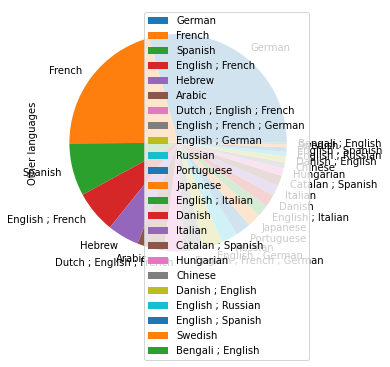

In [66]:
# Schritt 3:
# Wie sind nicht-nur-englischsprachige Titel verteilt? 
# Grafische Darstellung der Verteilung der nicht-(nur-) englischsprachigen Literatur 
# im Black-History-Month-Records-Dataset der British Library
import matplotlib.pyplot as plt

other_languages = pd.DataFrame({'Other languages': [131, 93, 35, 28, 21, 18, 13, 13, 13, 11, 
                                                    10, 9, 8, 8, 7, 7, 5, 4, 4, 3, 3, 2, 1]},
                  index=['German', 'French', 'Spanish', 'English ; French', 'Hebrew', 'Arabic', 
                         'Dutch ; English ; French', 'English ; French ; German', 'English ; German', 'Russian', 
                         'Portuguese', 'Japanese', 'English ; Italian', 'Danish', 'Italian', 'Catalan ; Spanish', 
                         'Hungarian', 'Chinese', 'Danish ; English', 'English ; Russian', 'English ; Spanish', 
                         'Swedish', 'Bengali ; English'])

plot = other_languages.plot.pie(y= 'Other languages', figsize=(5, 5))

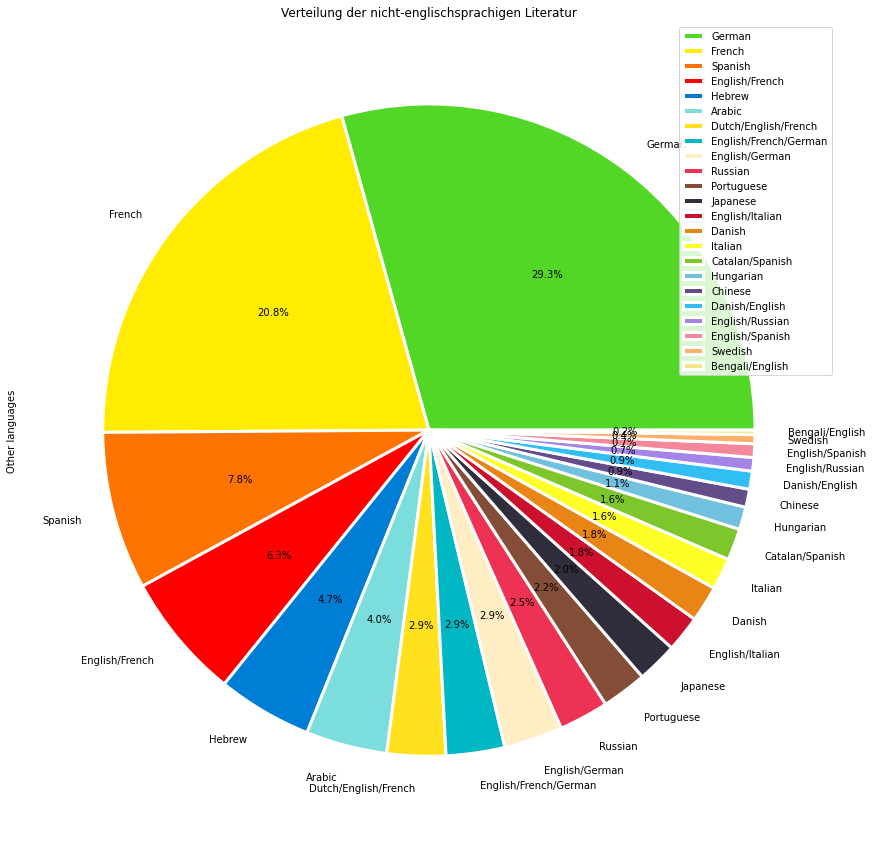

In [67]:
# Schritt 4: 
# Anpassungen: 
# - Größe
# - Titel
# - Prozentwerte
# - wedgeprops
# - Farben über HEX-Farbenpaletten:
# Colors Zeile 1: Raindow Pie Chart Color Scheme: https://www.schemecolor.com/raindow-pie-chart-colors-scheme.php
# Colors Zeile 2: Eric Cartman South Park Color Scheme: https://www.schemecolor.com/eric-cartman-south-park-cartoon-colors.php
# Colors Zeile 3: The Dark Side Of The Moon – Pink Floyd Color Scheme: https://www.schemecolor.com/the-dark-side-of-the-moon-pink-floyd-colors.php
# Colors Zeile 4: Bright Pastel Theme Color Palette: https://www.schemecolor.com/bright-pastel-theme.php
colors = ['#52D726', '#FFEC00', '#FF7300', '#FF0000', '#007ED6', '#7CDDDD',
          '#FFE11D', '#00B8C4', '#FFEEC3', '#EE3253', '#844D38', '#302E3C',
          '#CC102D', '#E88514', '#FFFF28', '#7DC62C', '#71C0DE', '#634C8A',
          '#31BFF3', '#A484E9', '#F4889A', '#FFAF68', '#F6E683']
other_languages = pd.DataFrame({'Other languages': [131, 93, 35, 28, 21, 18, 13, 13, 13, 11, 
                                                    10, 9, 8, 8, 7, 7, 5, 4, 4, 3, 3, 2, 1]},
                  index=['German', 'French', 'Spanish', 'English/French', 'Hebrew', 'Arabic', 
                         'Dutch/English/French', 'English/French/German', 'English/German', 'Russian', 
                         'Portuguese', 'Japanese', 'English/Italian', 'Danish', 'Italian', 'Catalan/Spanish', 
                         'Hungarian', 'Chinese', 'Danish/English', 'English/Russian', 'English/Spanish', 
                         'Swedish', 'Bengali/English'])

plot = other_languages.plot.pie(y= 'Other languages', figsize=(15, 15), 
                                title= 'Verteilung der nicht-englischsprachigen Literatur', 
                                autopct='%1.1f%%', 
                                wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
                                colors=colors)
# startangle=90